In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Nombre d'individus :  1281


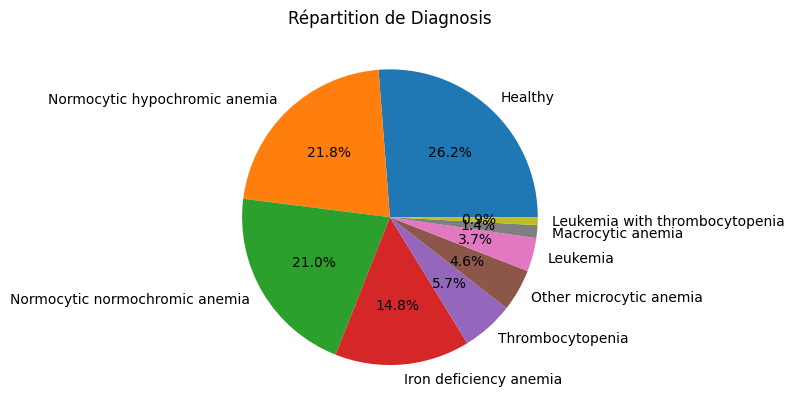

In [11]:
df = pd.read_csv('../dataset/diagnosed_cbc_data_v4.csv')
print("Nombre d'individus : ", df.shape[0])

plt.pie(df['Diagnosis'].value_counts(), labels=df['Diagnosis'].value_counts().index, autopct='%1.1f%%')
plt.title('Répartition de Diagnosis')
plt.show()

### Suppression des variables bruitées

In [12]:
print(df.tail(5))

       WBC    LYMp   NEUTp     LYMn    NEUTn   RBC   HGB      HCT   MCV   MCH  \
1276  4.40  25.845  77.511  1.88076  5.14094  4.86  13.5  46.1526  80.7  27.7   
1277  5.60  25.845  77.511  1.88076  5.14094  4.85  15.0  46.1526  91.7  31.0   
1278  9.20  25.845  77.511  1.88076  5.14094  4.47  13.1  46.1526  88.7  29.3   
1279  6.48  25.845  77.511  1.88076  5.14094  4.75  13.2  46.1526  86.7  27.9   
1280  8.80  25.845  77.511  1.88076  5.14094  4.95  15.2  46.1526  89.7  30.6   

      MCHC    PLT        PDW      PCT Diagnosis  
1276  34.4  180.0  14.312512  0.26028   Healthy  
1277  33.8  215.0  14.312512  0.26028   Healthy  
1278  33.0  329.0  14.312512  0.26028   Healthy  
1279  32.1  174.0  14.312512  0.26028   Healthy  
1280  34.2  279.0  14.312512  0.26028   Healthy  



A partir d'une certaine ligne, tous les individus ont les mêmes valeurs pour les variables suivantes : LYMn, LYMp, NEUTp, NEUTn, HCT, PDW et PCT

In [13]:
delete = ["LYMn", "LYMp", "NEUTp", "NEUTn", "HCT", "PDW", "PCT"]
df = df.drop(columns=delete)
print("Nombre d'individus : ", df.shape[0])

Nombre d'individus :  1281


### Suppression des individus aberrants

In [14]:
from scipy import stats

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
z_scores = np.abs(stats.zscore(df[numeric_cols]))
df = df[(z_scores < 3).all(axis=1)]

df = df.drop(df[df['MCH'] > 50].index)

print("Nombre d'individus : ", df.shape[0])

label_counts = df['Diagnosis'].value_counts()
print("Répartition des étiquettes :\n", label_counts)

Nombre d'individus :  1230
Répartition des étiquettes :
 Healthy                           335
Normocytic hypochromic anemia     263
Normocytic normochromic anemia    262
Iron deficiency anemia            180
Thrombocytopenia                   71
Other microcytic anemia            52
Leukemia                           38
Macrocytic anemia                  18
Leukemia with thrombocytopenia     11
Name: Diagnosis, dtype: int64


### Export 9 diagnosis

In [15]:
df.to_csv("../dataset/data_9diagnosis.csv", index=False)

### Suppression des diagnosis sous représentés 


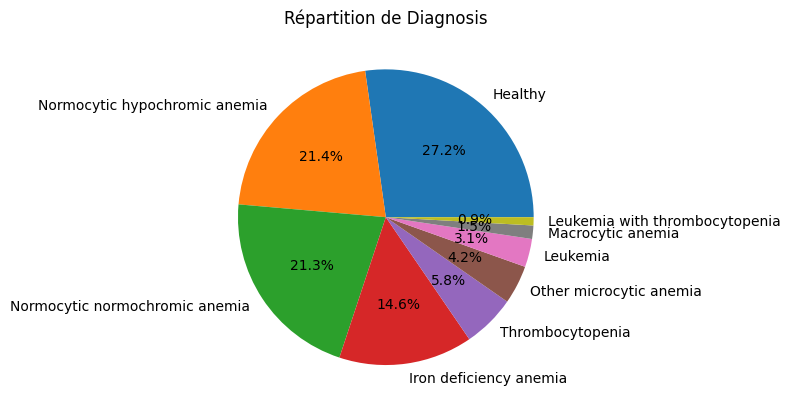

In [16]:
plt.pie(df['Diagnosis'].value_counts(), labels=df['Diagnosis'].value_counts().index, autopct='%1.1f%%')
plt.title('Répartition de Diagnosis')
plt.show()

### Export 7 Diagnosis

In [17]:
delete = ["Macrocytic anemia", "Leukemia with thrombocytopenia"]
df = df[~df['Diagnosis'].isin(delete)]
print("Nombre d'individus : ", df.shape[0])
df.to_csv("../dataset/data_7diagnosis.csv", index=False)

Nombre d'individus :  1201


### Export 5 Diagnosis

In [18]:
delete = ["Macrocytic anemia", "Leukemia", "Other microcytic anemia", "Leukemia with thrombocytopenia"]
df = df[~df['Diagnosis'].isin(delete)]
df.to_csv("../dataset/data_5diagnosis.csv", index=False)
print("Nombre d'individus : ", df.shape[0])

Nombre d'individus :  1111
